In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns

In [2]:
wine = pd.read_csv('wine-clustering.csv')            #loading the csv file

In [3]:
wine = pd.DataFrame(wine) #changing to dataframe
wine

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [4]:
wine.isnull()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,False,False,False,False,False,False,False,False,False,False,False,False,False
174,False,False,False,False,False,False,False,False,False,False,False,False,False
175,False,False,False,False,False,False,False,False,False,False,False,False,False
176,False,False,False,False,False,False,False,False,False,False,False,False,False


In [5]:
wine.isnull().sum() #checking for missing values

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [6]:
wine_cor = wine.corr() #chacking the correlation
wine_cor

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
Alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
Malic_Acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
Ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
Ash_Alcanity,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
Magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
Total_Phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
Flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
Nonflavanoid_Phenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
Proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417
Color_Intensity,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100


<AxesSubplot:>

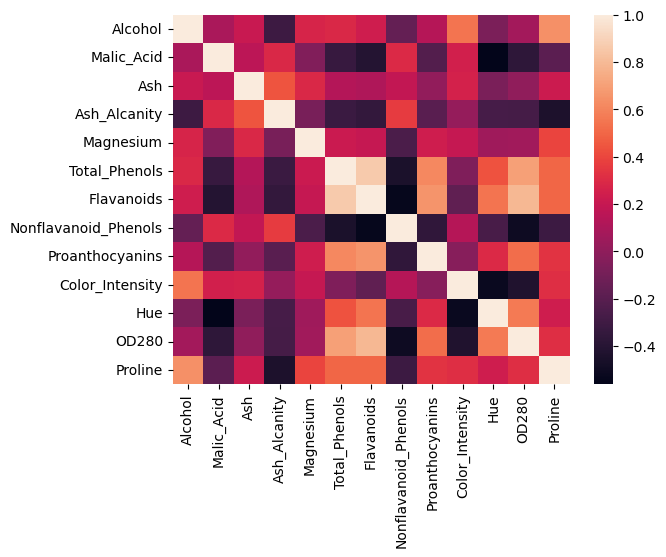

In [7]:
sns.heatmap(wine_cor) #there are very few colours in orange-purple, 
#no need to reduce the features to prevent multi collinearity

In [8]:
from sklearn.preprocessing import StandardScaler
scaler =StandardScaler()
x = wine.iloc[:,:].values

x = scaler.fit_transform(x)
#standardising the data, as the feature values have different scales

In [9]:
from sklearn.decomposition import PCA

# Create an instance of the PCA class
pca = PCA(n_components=2)

# Fit the PCA model to the dataset
pca.fit(x)

# Transform the data to the first two principal components
x= pca.transform(x)

Kmeans

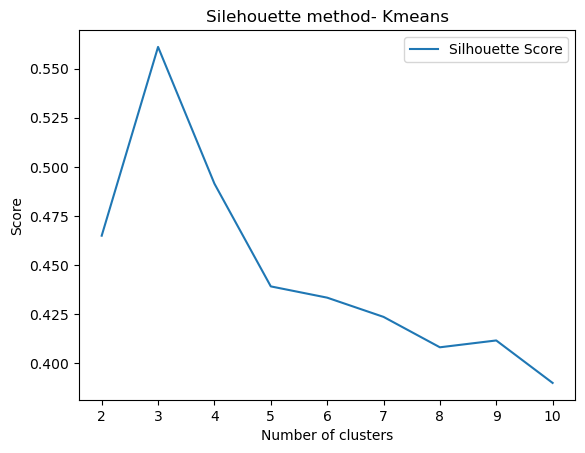

In [10]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
#list of scores
sil_scores = []

# Loop over different values of n_clusters
for n_clusters in range(2, 11):
    # Fit the K-Means model
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    kmeans.fit(x)
    labels = kmeans.labels_
    
    # Compute the silhouette score for the current n_clusters
    sil_scores.append(silhouette_score(x, labels))

# Plot the silhouette scores
plt.figure()
plt.plot(range(2, 11), sil_scores, label="Silhouette Score")
plt.xlabel("Number of clusters")
plt.ylabel("Score")
plt.legend()
plt.title('Silehouette method- Kmeans')
plt.show()

In [11]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

#using elbow method to find the optimum clusters

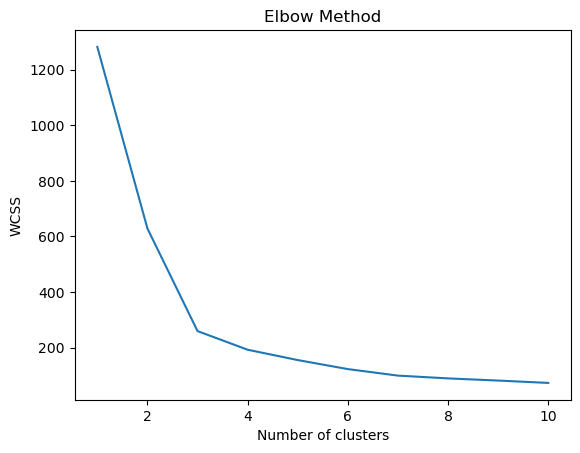

In [12]:
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show() #according to the elbow method the optimum number of cluster is 3 

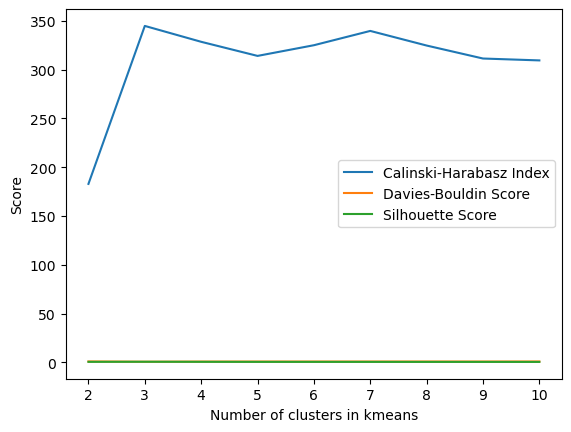

In [13]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
# Lists to store the scores
ch_scores = []
db_scores = []
sil_scores = []

# Loop over different values of n_clusters
for n_clusters in range(2, 11):
    # Fit the K-Means model
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    kmeans.fit(x)
    
    # Compute the scores for the current n_clusters
    ch_scores.append(calinski_harabasz_score(x, kmeans.labels_))
    db_scores.append(davies_bouldin_score(x, kmeans.labels_))
    sil_scores.append(silhouette_score(x, kmeans.labels_))

# Plot the scores
plt.figure()
plt.plot(range(2, 11), ch_scores, label="Calinski-Harabasz Index")
plt.plot(range(2, 11), db_scores, label="Davies-Bouldin Score")
plt.plot(range(2, 11), sil_scores, label="Silhouette Score")
plt.xlabel("Number of clusters in kmeans")
plt.ylabel("Score")
plt.legend()
plt.show()

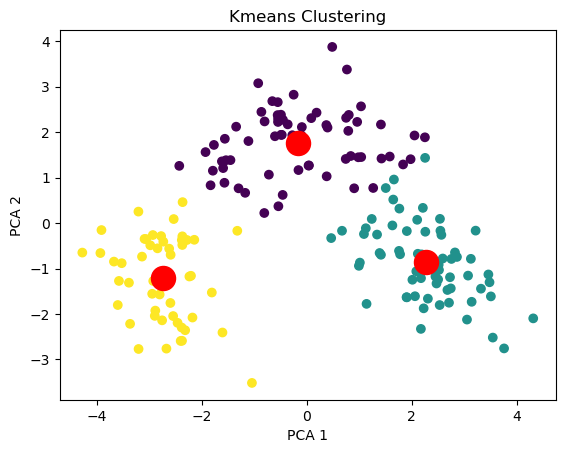

In [14]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y1 = kmeans.fit_predict(x)
plt.scatter(x[:,0], x[:,1], c=pred_y1)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Kmeans Clustering')
plt.show()

#visualising the clusters and its centroids

Gaussian Mixture Model

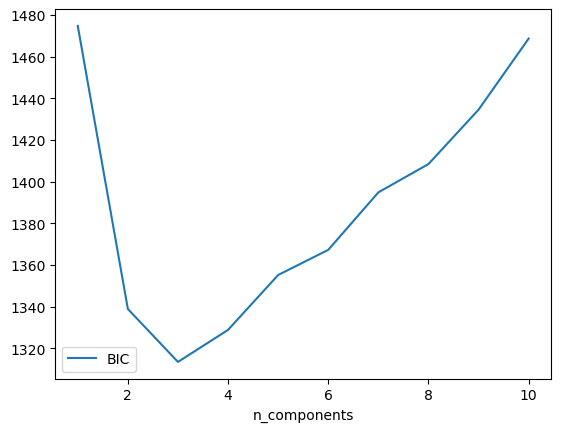

In [15]:
from sklearn.mixture import GaussianMixture

n_components = range(1, 11)
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(x)
          for n in n_components]

plt.plot(n_components, [m.bic(x) for m in models], label='BIC')
plt.legend(loc='best')
plt.xlabel('n_components');
plt.show()

#using AIC and BIC, finding the optimum clusers
#according to the plot, 2 is the optimum cluster for gmm

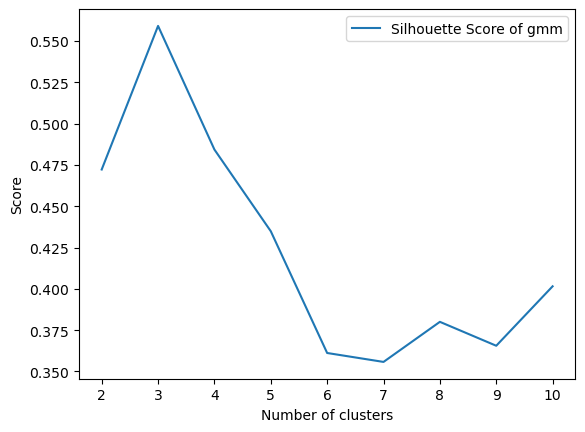

In [16]:

# Lists to store the scores
sil_scores = []

# Loop over different values of n_clusters
for n_clusters in range(2, 11):
    # Fit the GMM model
    gmm = GaussianMixture(n_components=n_clusters, random_state=0)
    gmm.fit(x)
    labels = gmm.predict(x)
    
    # Compute the silhouette score for the current n_clusters
    sil_scores.append(silhouette_score(x, labels))

# Plot the silhouette scores
plt.figure()
plt.plot(range(2, 11), sil_scores, label="Silhouette Score of gmm")
plt.xlabel("Number of clusters")
plt.ylabel("Score")
plt.legend()
plt.show()

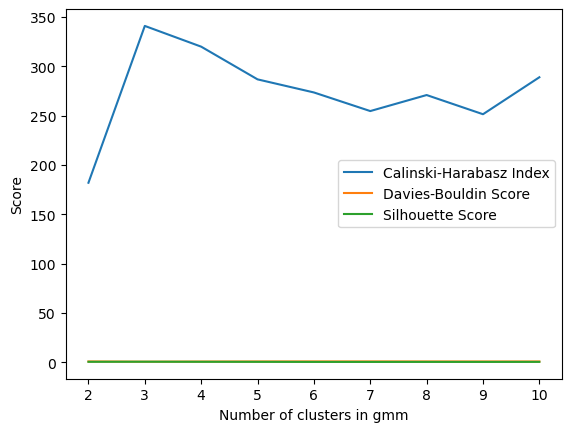

In [17]:
# Lists to store the scores
ch_scores = []
db_scores = []
sil_scores = []

# Loop over different values of n_clusters
for n_clusters in range(2, 11):
    # Fit the GMM model
    gmm = GaussianMixture(n_components=n_clusters, random_state=0)
    gmm.fit(x)
    
    # Compute the scores for the current n_clusters
    ch_scores.append(calinski_harabasz_score(x, gmm.predict(x)))
    db_scores.append(davies_bouldin_score(x, gmm.predict(x)))
    sil_scores.append(silhouette_score(x, gmm.predict(x)))

# Plot the scores
plt.figure()
plt.plot(range(2, 11), ch_scores, label="Calinski-Harabasz Index")
plt.plot(range(2, 11), db_scores, label="Davies-Bouldin Score")
plt.plot(range(2, 11), sil_scores, label="Silhouette Score")
plt.xlabel("Number of clusters in gmm")
plt.ylabel("Score")
plt.legend()

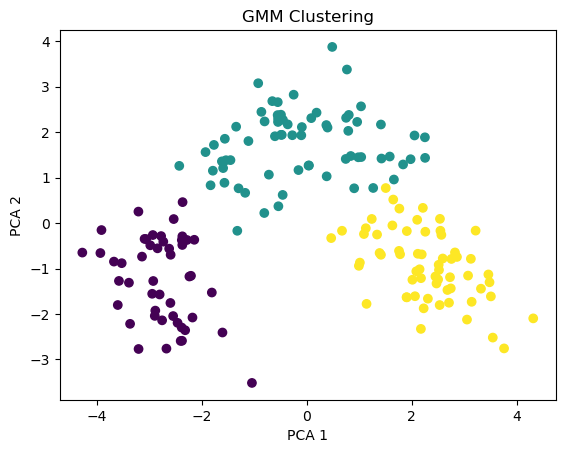

In [18]:
# Fitting GMM to the dataset
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

# Fitting GMM to the dataset
gmm = GaussianMixture(n_components=3,init_params='kmeans',n_init=1,random_state = 0)
gmm.fit(x)
gmm_labels = gmm.predict(x)

# Visualizing the clusters
plt.scatter(x[:, 0], x[:, 1], c=gmm_labels)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('GMM Clustering')
plt.show()

#visualising the gmm model using scatter plot

In [19]:
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score
from sklearn.metrics import  adjusted_mutual_info_score, silhouette_score

ch = calinski_harabasz_score(x,pred_y1)
db = davies_bouldin_score(x,pred_y1)
score_sil = silhouette_score(x, pred_y1)

print("Calinski Harabasz Index of kmeans : ", ch)
print("Davies Bouldin Score of kmeans: ", db)
print("Silhouette Score of kmeans:", score_sil)

ch = calinski_harabasz_score(x,gmm_labels)
db = davies_bouldin_score(x,gmm_labels)
score_sil = silhouette_score(x, gmm_labels)
print("Calinski Harabasz Index of gmm: ", ch)
print("Davies Bouldin Score of gmm: ", db)
print("Silhouette Score of gmm :", score_sil)

#comparing the results with different metrics

Calinski Harabasz Index of kmeans :  344.79259483209967
Davies Bouldin Score of kmeans:  0.5972661544221364
Silhouette Score of kmeans: 0.5610505693103246
Calinski Harabasz Index of gmm:  340.94214676370336
Davies Bouldin Score of gmm:  0.6019141028137758
Silhouette Score of gmm : 0.5591116207103001


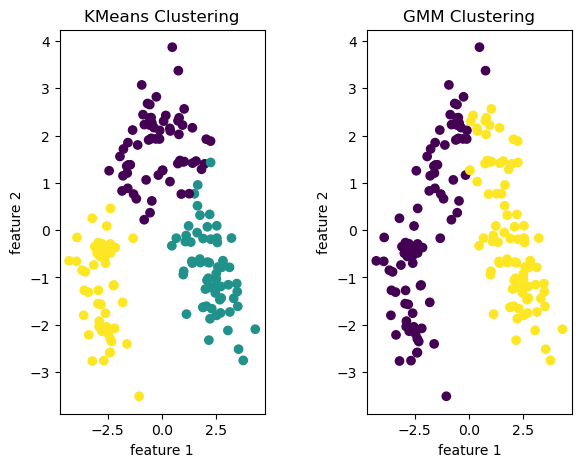

In [20]:
# KMeans Clustering
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y1 = kmeans.fit_predict(x)

# Plotting the KMeans Clustering
plt.subplot(1, 2, 1)
plt.scatter(x[:, 0], x[:, 1], c=pred_y1)
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.title('KMeans Clustering')

# GMM Clustering
gmm = GaussianMixture(n_components=2)
gmm.fit(x)
gmm_labels = gmm.predict(x)

# Plotting the GMM Clustering
plt.subplot(1, 2, 2)
plt.scatter(x[:, 0], x[:, 1], c=gmm_labels)
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.title('GMM Clustering')

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.5, hspace=0.5)
plt.show()

#comparing the both clustering points side by side




Comparision between two model performance

In [27]:
#Based on the metrics KMeans outperformed gmm on almost all aspects
#The real data is having 3 clusters, which validates that the KMeans clustering coorectly predicted the number of clusters.